In [16]:
import backtrader as bt
import datetime
import matplotlib as mpl
%matplotlib inline

<IPython.core.display.Javascript object>


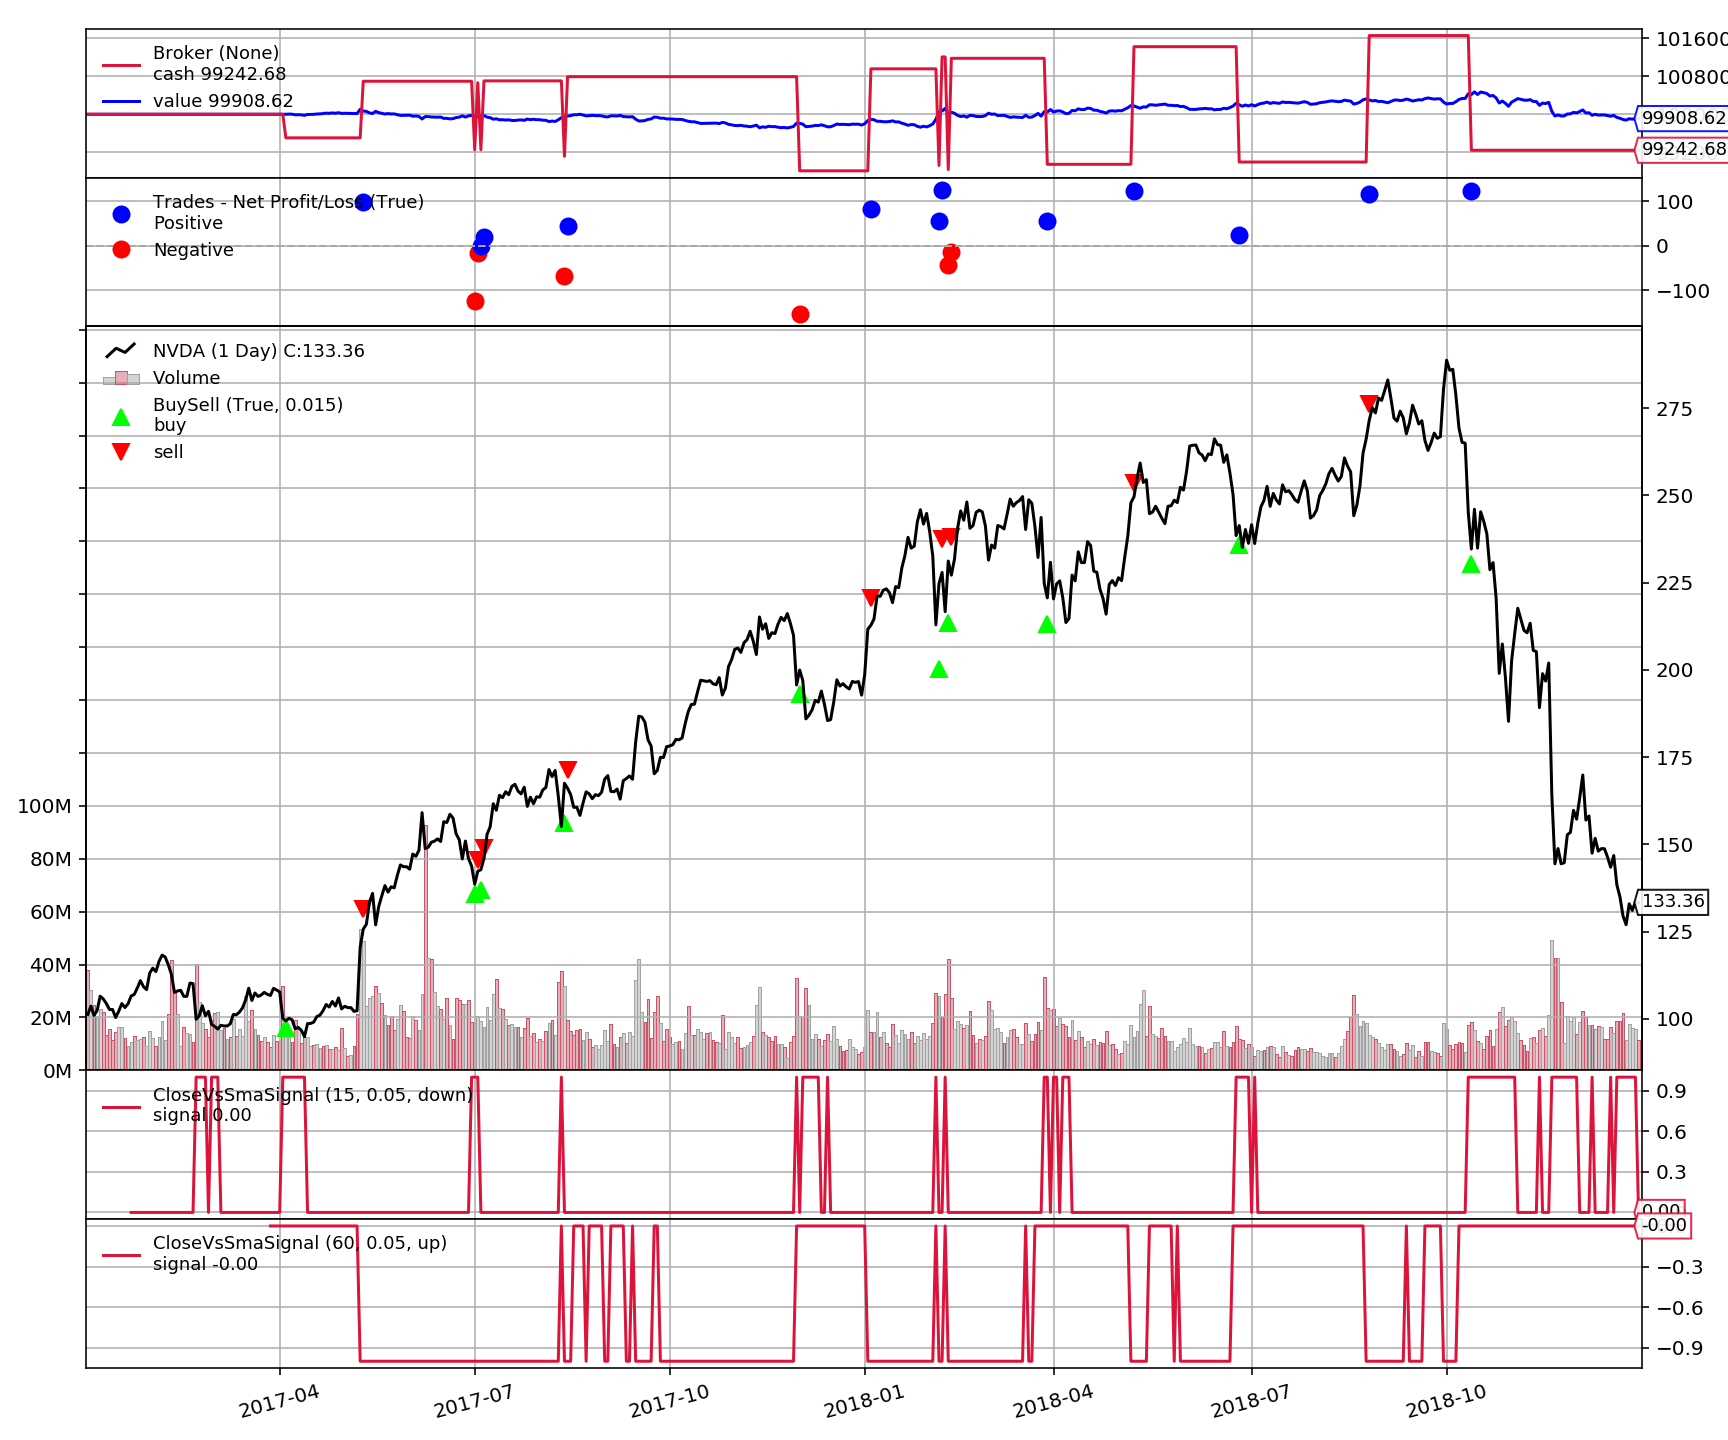

In [37]:
class CloseVsSmaSignal(bt.Indicator):
    lines = ('signal',)
    
    params = (
        ('window', 30),
        ('gap', .1),
        ('mdir', 'down')
    )

    def __init__(self):
        sma = bt.indicators.SMA(period=self.p.window)
        min_gap_val = sma*self.p.gap
        gap = self.data - sma
        
        if self.p.mdir=='down':
            self.lines.signal = gap < -min_gap_val
        elif self.p.mdir=='up':
            self.lines.signal = -(gap > min_gap_val)

cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)

data = bt.feeds.YahooFinanceCSVData(
        dataname='NVDA.csv',
        fromdate=datetime.datetime(2017, 1, 1),
        todate=datetime.datetime(2019, 1, 1),
        reverse=False)
cerebro.adddata(data)

cerebro.add_signal(bt.SIGNAL_LONG, CloseVsSmaSignal, window=15, mdir='down', gap=.05)
cerebro.add_signal(bt.SIGNAL_SHORT, CloseVsSmaSignal, window=60, mdir='up', gap=.05)
cerebro.addsizer(bt.sizers.PercentSizer, percents=.5)

cerebro.run()

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(12,10))
    cerebro.plot();